# Why flights delay? 


## The main point: Classification using Random Forest

This note is intended to perform data analysis on the US domestic air traffic between 2004-2007. The data has individual trip information: airlines, which date, what time the flight took off and landed, and take-off and destination airports. Here we will use the random forest model in the sciki-learn library: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier to perform classification and identify whether the flight will delay more than 15 mins or not. We will analyze what the most important factor result the flights delay.

First we load the data and see what attributes we have:

In [48]:
import pandas as pd
import numpy as np
import random
DF = pd.read_csv('data-0.1m.csv')
DF.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,2006,c-11,c-22,c-3,1316,AA,FAT,DFW,1313,N
1,2004,c-10,c-12,c-2,1242,US,SAN,PHL,2369,N
2,2006,c-5,c-5,c-5,1302,OO,SBP,SFO,191,Y
3,2005,c-8,c-8,c-1,1138,DL,PHL,ATL,665,N
4,2005,c-4,c-3,c-7,1438,DL,ATL,BDL,859,N


In [49]:
DF.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
99995,2005,c-5,c-23,c-1,1730,FL,MLI,ATL,633,N
99996,2006,c-1,c-23,c-1,1515,AS,FAI,ANC,261,N
99997,2005,c-6,c-16,c-4,1611,OO,BIL,DEN,455,N
99998,2005,c-4,c-10,c-7,1229,OO,ORD,CLE,316,Y
99999,2006,c-8,c-5,c-6,1835,YV,CLT,IAH,913,N


In [50]:
DF.shape

(100000, 10)

From above procedures, there are 100,000 observations and 10 attributes. The data date is between 2004-2007.

## Converting categorical variables as dummy variables

In our problem, we try to build a model to classify the binary targets: whether delay or not, so y = 0/1. Prior to model fitting, first we need to convert all category variables to quantitative variables by using dummy variable:

In [51]:
DF = pd.get_dummies(DF)

In [52]:
DF.shape

(100000, 691)

Note that now after introducing the dummy variables, there are 691 attributes, rather than 10 features. Now the attributes includ the month, day and airport informations. For example, a flight is on 5/23 Wed from FAT to DFW. The "Month_c-5" =1, other =0, "DayofMonth_c-23"=0 other DayofMonth_c.. =0; "Dest_DFW"=1 and other "Dest_.."=0. 

In [45]:
DF.dtypes

Year                     int64
DepTime                  int64
Distance                 int64
Month_c-1              float64
Month_c-10             float64
Month_c-11             float64
Month_c-12             float64
Month_c-2              float64
Month_c-3              float64
Month_c-4              float64
Month_c-5              float64
Month_c-6              float64
Month_c-7              float64
Month_c-8              float64
Month_c-9              float64
DayofMonth_c-1         float64
DayofMonth_c-10        float64
DayofMonth_c-11        float64
DayofMonth_c-12        float64
DayofMonth_c-13        float64
DayofMonth_c-14        float64
DayofMonth_c-15        float64
DayofMonth_c-16        float64
DayofMonth_c-17        float64
DayofMonth_c-18        float64
DayofMonth_c-19        float64
DayofMonth_c-2         float64
DayofMonth_c-20        float64
DayofMonth_c-21        float64
DayofMonth_c-22        float64
                        ...   
Dest_STT               float64
Dest_STX

## Preparing cross-validation dataset

Next step we filter out the 2007 data as the cross-validaiton dataset. And others are used to be the training and test datasets.

In [55]:
DF_val = DF[DF.Year == 2007]
DF_val.head()

,Year,DepTime,Distance,Month_c-1,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,...,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,dep_delayed_15min_N,dep_delayed_15min_Y
7,2007,1839,479,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,2007,2115,630,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,2007,757,1608,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
21,2007,556,668,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
24,2007,632,1034,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
DF_val.shape

(25719, 691)

## Preparing non cross-validation data

In [56]:
#a = [random.randint(0, 100000) for x in range(10000)]
#sample = DF.iloc[a,:]
DF = DF[DF.Year != 2007]

In [57]:
DF.shape

(74281, 691)

In [58]:
#sample = DF.sample(frac =0.1)
sample = DF.sample(frac =1)
sample.head()

,Year,DepTime,Distance,Month_c-1,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,...,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,dep_delayed_15min_N,dep_delayed_15min_Y
65517,2005,1639,838,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98268,2006,644,1726,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
73711,2006,812,197,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13428,2004,1502,980,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8071,2004,1145,1723,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
sample.shape

(74281, 691)

In [62]:
X = sample.loc[:,'Year':'Dest_YUM']
X.head()

,Year,DepTime,Distance,Month_c-1,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,...,Dest_VCT,Dest_VIS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
65517,2005,1639,838,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98268,2006,644,1726,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73711,2006,812,197,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13428,2004,1502,980,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8071,2004,1145,1723,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
Y = sample.loc[:,'dep_delayed_15min_Y']
Y.head()

65517    0
98268    0
73711    0
13428    0
8071     0
Name: dep_delayed_15min_Y, dtype: float64

## Setting up training and test datasets

In [64]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
X_train.shape

(49768, 689)

In [65]:
X_test.shape

(24513, 689)

## Implementing the random forest classifier

In the following, we use the training dataset to train the random forest model. We first tentatively consider 4 estimators:

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

clf = RandomForestClassifier(n_estimators=4)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
Y_train_prob = clf.predict_proba(X_train)
Y_test_prob = clf.predict_proba(X_test)

In [68]:
from sklearn import metrics, cross_validation
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set_context("notebook", font_scale=1.5,rc={"lines.linewidth": 3})
%matplotlib inline

fpr_train, tpr_train, _ = metrics.roc_curve(Y_train,Y_train_prob[:,1])
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [69]:
Y_train_prob[:,1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [70]:
fpr_test, tpr_test, _ = metrics.roc_curve(Y_test,Y_test_prob[:,1])
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [71]:
X_val = DF_val.loc[:,'Year':'Dest_YUM']
Y_val = DF_val.loc[:,'dep_delayed_15min_Y']
Y_val_prob = clf.predict_proba(X_val)
fpr_val, tpr_val, _ = metrics.roc_curve(Y_val,Y_val_prob[:,1])
roc_auc_val = metrics.auc(fpr_val, tpr_val)

Next we should visualize how good our model does. The function "ROCplot" is defined to make ROC plot:

In [72]:
def ROCplot(fpr_train, tpr_train, fpr_test, tpr_test, fpr_val, tpr_val):
    plt.figure(figsize=(8,6))
    plt.plot(fpr_train, tpr_train, color = 'r')
    plt.plot(fpr_test, tpr_test, color = 'g')
    plt.plot(fpr_val, tpr_val, color = 'b')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Model threshold')
    green_line = mlines.Line2D([], [], color='green', label='ROC test (area = %0.2f)' % np.mean(roc_auc_test))
    red_line = mlines.Line2D([], [], color='red', label='ROC train (area = %0.2f)' % roc_auc_train)
    blue_line = mlines.Line2D([], [], color='blue', label='ROC val (area = %0.2f)' % roc_auc_val)
    plt.legend(handles=[red_line, green_line, blue_line],loc="lower right")
    #plt.savefig('ROC_overfit.pdf')

## Overfitting issue

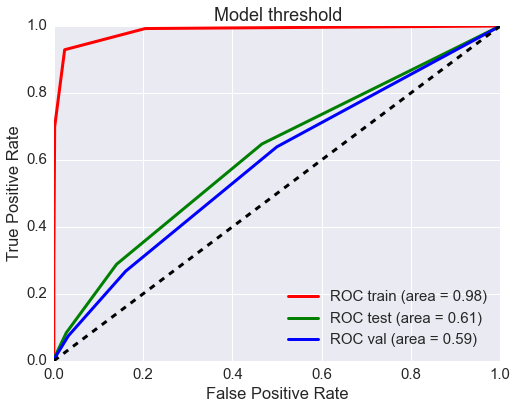

In [73]:
ROCplot(fpr_train, tpr_train, fpr_test, tpr_test, fpr_val, tpr_val)

From the ROC plot, we can see the model has been overfitting, even though we only consider 4 estimators. The training set shows very good performance, but the test and CV sets indicate poor performance. This is a common issue for an overfitting model. To fix this issue, we need to consider other more systematic ways to find the best estimators without overfitting.

## Grid Search

Here we will do grid search. We can choose the number of estimators, and maximal depth, and minimal number of leaf of each tree. We examine all parameter and fit the model to select the best one.

In [76]:
sample = DF.sample(frac =0.2)
X = sample.loc[:,'Year':'Dest_YUM']
Y = sample.loc[:,'dep_delayed_15min_Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

But here instead doing the grid search using the entire training set (which is large), we can only randomly choose 20% of the all dataset to speed up the grid search. Next step is doing the grid search:

In [77]:
from sklearn import grid_search
rf = RandomForestClassifier()
parameters = {'n_estimators': [10,20,50,100,200],'max_depth':[5,15,25],'min_samples_leaf':[10,20,50]}
model_cv_grid = grid_search.GridSearchCV(rf,parameters,scoring='roc_auc',verbose=2,n_jobs=-1)
model_cv_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  41 jobs       | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 129 out of 135 | elapsed:  6.1min remaining:   17.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  6.4min finished


[CV] min_samples_leaf=10, n_estimators=10, max_depth=5 ...............
[CV] min_samples_leaf=10, n_estimators=10, max_depth=5 ...............
[CV] min_samples_leaf=10, n_estimators=10, max_depth=5 ...............
[CV] min_samples_leaf=10, n_estimators=20, max_depth=5 ...............
[CV] ...... min_samples_leaf=10, n_estimators=10, max_depth=5 -   0.2s[CV] ...... min_samples_leaf=10, n_estimators=10, max_depth=5 -   0.2s[CV] ...... min_samples_leaf=10, n_estimators=10, max_depth=5 -   0.2s[CV] ...... min_samples_leaf=10, n_estimators=20, max_depth=5 -   0.2s



[CV] min_samples_leaf=10, n_estimators=20, max_depth=5 ...............[CV] min_samples_leaf=10, n_estimators=20, max_depth=5 ...............[CV] min_samples_leaf=10, n_estimators=50, max_depth=5 ...............[CV] min_samples_leaf=10, n_estimators=50, max_depth=5 ...............



[CV] ...... min_samples_leaf=10, n_estimators=20, max_depth=5 -   0.2s[CV] ...... min_samples_leaf=10, n_estimators=20, max_depth=5 -   0.2s[CV] ...

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'min_samples_leaf': [10, 20, 50], 'n_estimators': [10, 20, 50, 100, 200], 'max_depth': [5, 15, 25]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=2)





[CV] ..... min_samples_leaf=20, n_estimators=20, max_depth=15 -   0.3s[CV] ..... min_samples_leaf=20, n_estimators=20, max_depth=15 -   0.3s[CV] ..... min_samples_leaf=20, n_estimators=50, max_depth=15 -   0.6s[CV] ..... min_samples_leaf=20, n_estimators=50, max_depth=15 -   0.7s



[CV] min_samples_leaf=20, n_estimators=50, max_depth=15 ..............[CV] min_samples_leaf=20, n_estimators=100, max_depth=15 .............[CV] min_samples_leaf=20, n_estimators=100, max_depth=15 .............[CV] min_samples_leaf=20, n_estimators=100, max_depth=15 .............



[CV] ..... min_samples_leaf=20, n_estimators=50, max_depth=15 -   0.6s[CV] .... min_samples_leaf=20, n_estimators=100, max_depth=15 -   1.1s[CV] .... min_samples_leaf=20, n_estimators=100, max_depth=15 -   1.3s[CV] .... min_samples_leaf=20, n_estimators=100, max_depth=15 -   1.1s



[CV] min_samples_leaf=20, n_estimators=200, max_depth=15 .............[CV] min_samples_leaf=20, n_estimators=200, max_depth=15 .............[CV]

In [78]:
model_cv_grid.grid_scores_

[mean: 0.63998, std: 0.04697, params: {'min_samples_leaf': 10, 'n_estimators': 10, 'max_depth': 5},
 mean: 0.67969, std: 0.01989, params: {'min_samples_leaf': 10, 'n_estimators': 20, 'max_depth': 5},
 mean: 0.69022, std: 0.01000, params: {'min_samples_leaf': 10, 'n_estimators': 50, 'max_depth': 5},
 mean: 0.69301, std: 0.00839, params: {'min_samples_leaf': 10, 'n_estimators': 100, 'max_depth': 5},
 mean: 0.69412, std: 0.01007, params: {'min_samples_leaf': 10, 'n_estimators': 200, 'max_depth': 5},
 mean: 0.63291, std: 0.04390, params: {'min_samples_leaf': 20, 'n_estimators': 10, 'max_depth': 5},
 mean: 0.67389, std: 0.01346, params: {'min_samples_leaf': 20, 'n_estimators': 20, 'max_depth': 5},
 mean: 0.67934, std: 0.01684, params: {'min_samples_leaf': 20, 'n_estimators': 50, 'max_depth': 5},
 mean: 0.69053, std: 0.01019, params: {'min_samples_leaf': 20, 'n_estimators': 100, 'max_depth': 5},
 mean: 0.69618, std: 0.01145, params: {'min_samples_leaf': 20, 'n_estimators': 200, 'max_depth': 

## Determined best parameters for the RF model via grid search

In [79]:
best_model = model_cv_grid.best_estimator_
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Now we have the best parameters set for the random forest model. The max depth =25, min leaf =10, and number of estimators =100. Next let us further examine the new best estimated model's performace:

In [80]:
model_tuned = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
X = DF.loc[:,'Year':'Dest_YUM']
Y = DF.loc[:,'dep_delayed_15min_Y']
print (X.shape)
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y)

(74281, 689)


In [82]:
model_tuned.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
Y_train_prob = model_tuned.predict_proba(X_train)
Y_test_prob = model_tuned.predict_proba(X_test)
Y_val_prob = model_tuned.predict_proba(X_val)

In [84]:
fpr_train, tpr_train, _ = metrics.roc_curve(Y_train,Y_train_prob[:,1])
roc_auc_train = metrics.auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = metrics.roc_curve(Y_test,Y_test_prob[:,1])
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_val, tpr_val, _ = metrics.roc_curve(Y_val,Y_val_prob[:,1])
roc_auc_val = metrics.auc(fpr_val, tpr_val)

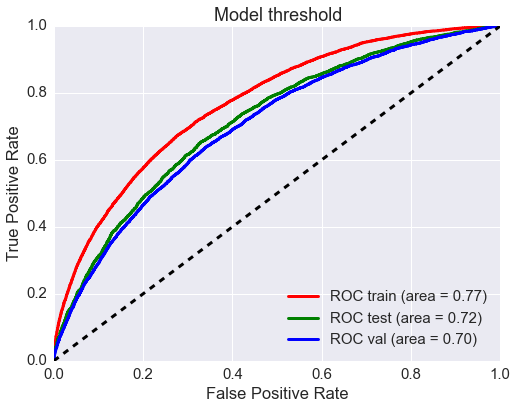

In [85]:
ROCplot(fpr_train, tpr_train, fpr_test, tpr_test, fpr_val, tpr_val)

From the above results, the overfitting issue is no longer existing. Also the accuracy is raised. Both test set and CV stes show better perform than previous results. This shows after grid searching, we have better RF model to predict new observation.

## Which estimators are more significant?

Recalled our grid search results, the best model is given:

In [86]:
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Next let's explore what attribute cause flights delay more significantly? Now we have built our models, and then we can find the importance of each feature:

In [121]:
importance = best_model.feature_importances_
attribute = X.columns

In [125]:
v = sorted(range(len(importance)), key=lambda k: importance[k], reverse=True)
sorted_importance = [importance[i] for i in v]
sorted_attribute = [attribute[i] for i in v]

df_importance = pd.DataFrame({'variable': sorted_attribute, 'importance' : sorted_importance})
df_importance.sort_index().head(5)

,importance,variable
0,0.380845,DepTime
1,0.049122,Distance
2,0.026713,Month_c-12
3,0.021533,Year
4,0.019153,Origin_ORD


From this, we can see the most important factor to cause flights delay is the Departure time. Second is the distance. And then it is more frequent to happen in Dec. We can also see these in a bar chart:

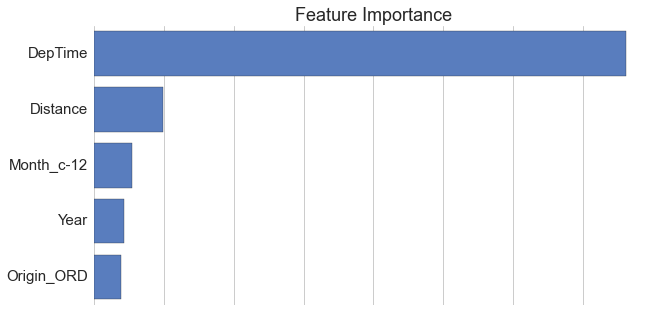

In [133]:
x = sorted_importance[:5]
y = sorted_attribute[:5]
sns.set(style="whitegrid",font_scale=1.5)
f, ax = plt.subplots(figsize=(10, 5))
sns.set_color_codes("muted")
sns.barplot(x=x, y=y, color="b")
ax.set(xticklabels=[],ylabel='',xlabel='',title='Feature Importance')
sns.despine(left=True, bottom=True)